# **Task 03**
### Predicting the optimal number of clusters (Unsupervised ML)
## The Sparks Foundation
### Data Science & Business Analytics
### *Muhammad Atif Shahzad*
- email: matifsh2@hotmail.com
### GRIP October 2022

In [44]:
# import necessary libraries used in this project
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Import Dataset

In [45]:
# Import Dataset regarding Terrorism
import codecs

df_terrorism= pd.read_csv("globalterrorism.csv", encoding='ISO-8859-1')

C:\Users\HP\AppData\Local\Temp\ipykernel_24732\763375768.py:4: DtypeWarning: Columns (48,49,50,63,66,81,83,101,102,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df_terrorism= pd.read_csv("globalterrorism.csv", encoding='ISO-8859-1')


In [46]:
# Check first five records of Dataset
df_terrorism.head()

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,78,Greece,8,Western Europe,Attica,Athens,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,101,Japan,4,East Asia,Fukouka,Fukouka,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [49]:
df_terrorism.shape
print("Data has has %d rows"%df_terrorism.shape[0], "and %d"%df_terrorism.shape[1],"Columns")

Data has has 181691 rows and 122 Columns


### Rename the name of Columns 

In [6]:
terrorism_df=df_terrorism.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                             'provstate':'State','city':'City','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type',
                             'targsubtype1_txt':'Target_subtype','gname':'Gang_name','weaptype1_txt':'Weapon_type'})

In [11]:
terrorism_df.columns

Index(['eventid', 'Year', 'Month', 'Day', 'country', 'Country', 'region',
       'Region', 'State', 'City',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=122)

### Pick necessary Columns useful for our insights

In [38]:
terrorism_df=terrorism_df[['Year','Month','Day','Country','Region','State','City','Attack_type','Target_type','Target_subtype','Gang_name','Weapon_type']]

In [39]:
terrorism_df.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'Attack_type', 'Target_type', 'Target_subtype', 'Gang_name',
       'Weapon_type'],
      dtype='object')

In [51]:
# Check the shape of our selected Dataframe
terrorism_df.shape

(181691, 12)

In [52]:
# CHeck Null Values in data
terrorism_df.isnull().sum()

Year                  0
Month                 0
Day                   0
Country               0
Region                0
State               421
City                434
Attack_type           0
Target_type           0
Target_subtype    10373
Gang_name             0
Weapon_type           0
dtype: int64

### Replace Null Values in Columns, Target_subtype with 0
### State and City Values with Unkinown

In [55]:
terrorism_df['Target_subtype']=terrorism_df['Target_subtype'].fillna(0)

C:\Users\HP\AppData\Local\Temp\ipykernel_24732\3999037003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terrorism_df['Target_subtype']=terrorism_df['Target_subtype'].fillna(0)


In [56]:
terrorism_df['State']=terrorism_df['State'].fillna('Unknown')

C:\Users\HP\AppData\Local\Temp\ipykernel_24732\24694106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terrorism_df['State']=terrorism_df['State'].fillna('Unknown')


In [57]:
terrorism_df["City"]=terrorism_df["City"].fillna('Unknown')

C:\Users\HP\AppData\Local\Temp\ipykernel_24732\571771354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terrorism_df["City"]=terrorism_df["City"].fillna('Unknown')


In [58]:
terrorism_df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
Region            0
State             0
City              0
Attack_type       0
Target_type       0
Target_subtype    0
Gang_name         0
Weapon_type       0
dtype: int64

In [60]:
# Check the Data type of Columns
terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Year            181691 non-null  int64 
 1   Month           181691 non-null  int64 
 2   Day             181691 non-null  int64 
 3   Country         181691 non-null  object
 4   Region          181691 non-null  object
 5   State           181691 non-null  object
 6   City            181691 non-null  object
 7   Attack_type     181691 non-null  object
 8   Target_type     181691 non-null  object
 9   Target_subtype  181691 non-null  object
 10  Gang_name       181691 non-null  object
 11  Weapon_type     181691 non-null  object
dtypes: int64(3), object(9)
memory usage: 16.6+ MB


In [61]:
# Check the descriptive summary of numerial columns
terrorism_df.describe()

,Year,Month,Day
count,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644
std,13.259430,3.388303,8.814045
min,1970.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000
50%,2009.000000,6.000000,15.000000
75%,2014.000000,9.000000,23.000000
max,2017.000000,12.000000,31.000000


### EDA on Dataset

In [15]:
Total_countries=terrorism_df['Country'].nunique()
print("Total %d countries were noted in the data"%Total_countries)


Total 205 countries were noted in the data


In [16]:
Total_Regions=terrorism_df['Region'].nunique()
print("Total %d Regions were noted in the data"%Total_Regions)


Total 12 Regions were noted in the data


In [ ]:
terrorism_df.Region.unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [ ]:
total_attacks=terrorism_df['Attack_type'].count()
print("Total %d attacks type were noted in the data"%total_attacks)



Total 181691 attacks type were noted in the data


### Top 10 Most effected Regions 

In [ ]:
terrorism_df['Attack_type'].groupby(terrorism_df["Region"]).count().sort_values(ascending=False).head(10)

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Attack_type, dtype: int64

### Top 10 most effected Countries 

In [ ]:
terrorism_df['Attack_type'].groupby(terrorism_df["Country"]).count().sort_values(ascending=False).head(10)

Country
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Attack_type, dtype: int64

### Top 10 most effection States

In [ ]:
terrorism_df['Attack_type'].groupby(terrorism_df["State"]).count().sort_values(ascending=False).head(10)

State
Baghdad               7645
Unknown               4711
Northern Ireland      4498
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: Attack_type, dtype: int64

## Visualtion of Findings

c:\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

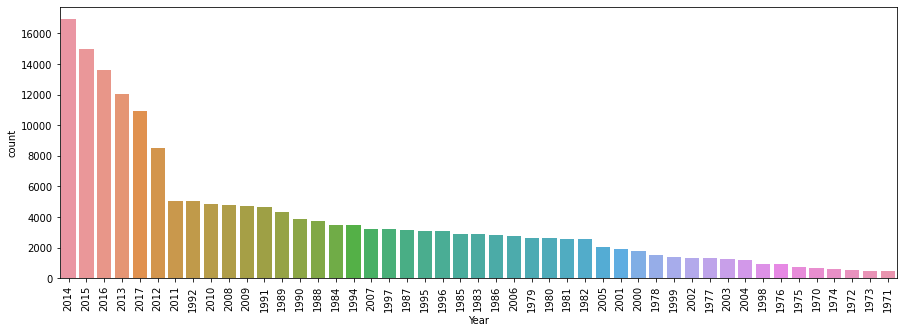

In [34]:
plt.figure(figsize=(15,5))
#plt.rcParams.update({'font.size':10});
plt.xticks(rotation = 90)

sns.countplot(terrorism_df.Year,  order = terrorism_df['Year'].value_counts().index)


### Conclusion: From 2012 to 2017, its seen a dramatically increase in Terrorism

c:\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack_type', ylabel='count'>

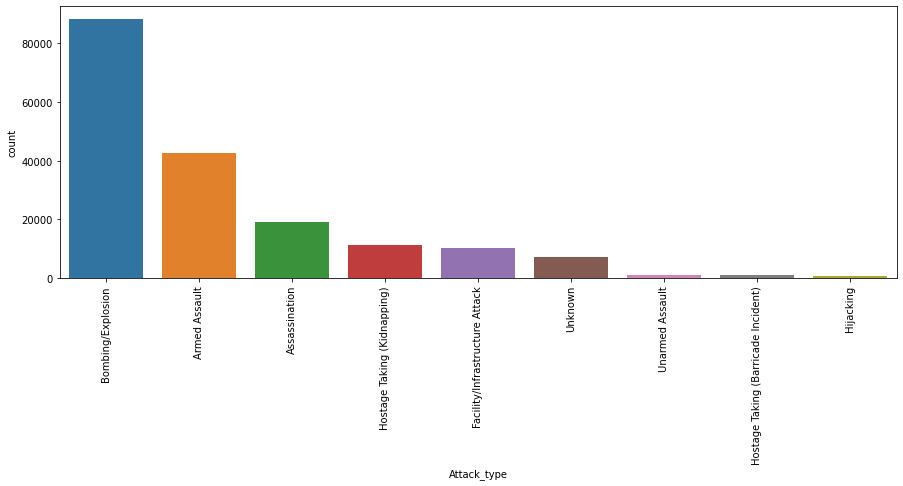

In [33]:
plt.figure(figsize=(15,5))
#plt.rcParams.update({'font.size':10});
plt.xticks(rotation = 90)
sns.countplot(terrorism_df.Attack_type, order=terrorism_df['Attack_type'].value_counts().index)

### Conclusion: Frequent way of attack is by Bombing Explosion followed by Armed Assault and Assination

c:\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Region', ylabel='count'>

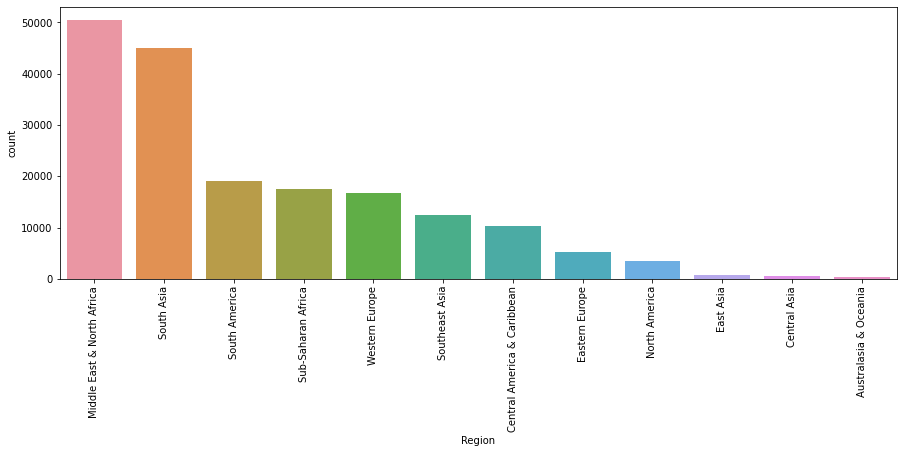

In [27]:
plt.figure(figsize=(15,5))
#plt.rcParams.update({'font.size':10});
plt.xticks(rotation = 90)

sns.countplot(terrorism_df.Region,  order = terrorism_df['Region'].value_counts().index)


### Conclusion: Most effected Regions are Middle East & North Africe followed by South Asia & South America

c:\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Country', ylabel='count'>

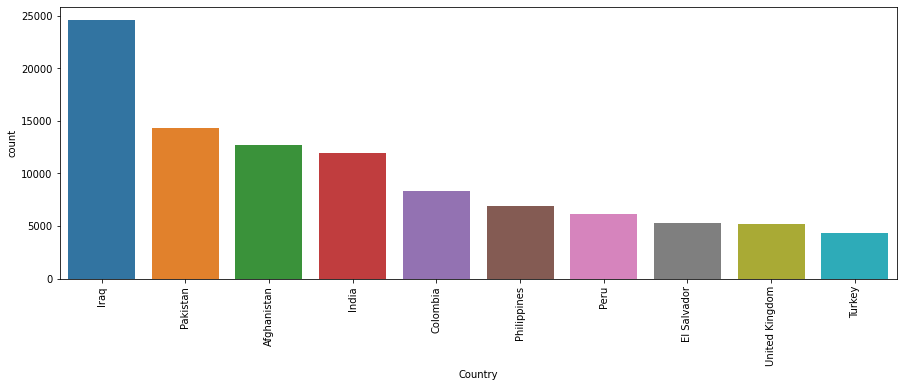

In [42]:
plt.figure(figsize=(15,5))
#plt.rcParams.update({'font.size':10});
plt.xticks(rotation = 90)

sns.countplot(terrorism_df.Country,  order = terrorism_df['Country'].value_counts().head(10).index)


### Conclusion: Most effected Countries are Iraq on the top followed by Pakistan, Afghanistan & India

c:\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target_type', ylabel='count'>

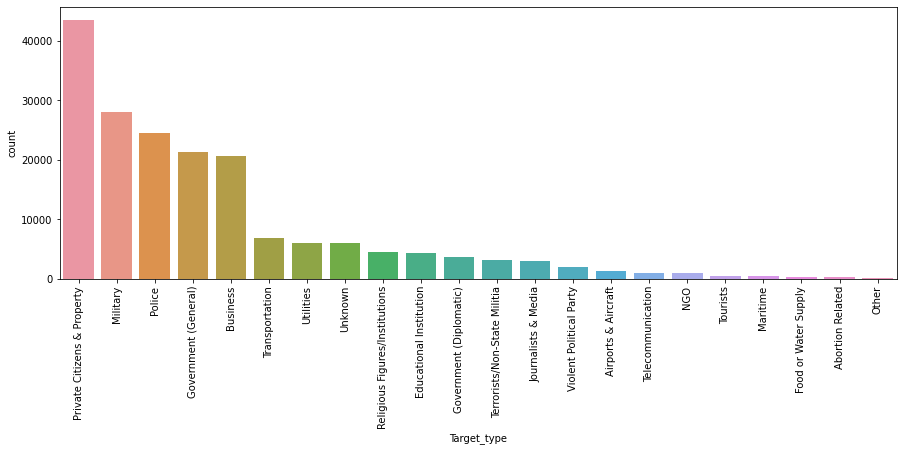

In [40]:
plt.figure(figsize=(15,5))
#plt.rcParams.update({'font.size':10});
plt.xticks(rotation = 90)

sns.countplot(terrorism_df.Target_type,  order = terrorism_df['Target_type'].value_counts().index)


### Conclusion: Mostly effected and hot targets were Private Citizens & Proerty followed by Military, Police and Government Instituation.

c:\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gang_name', ylabel='count'>

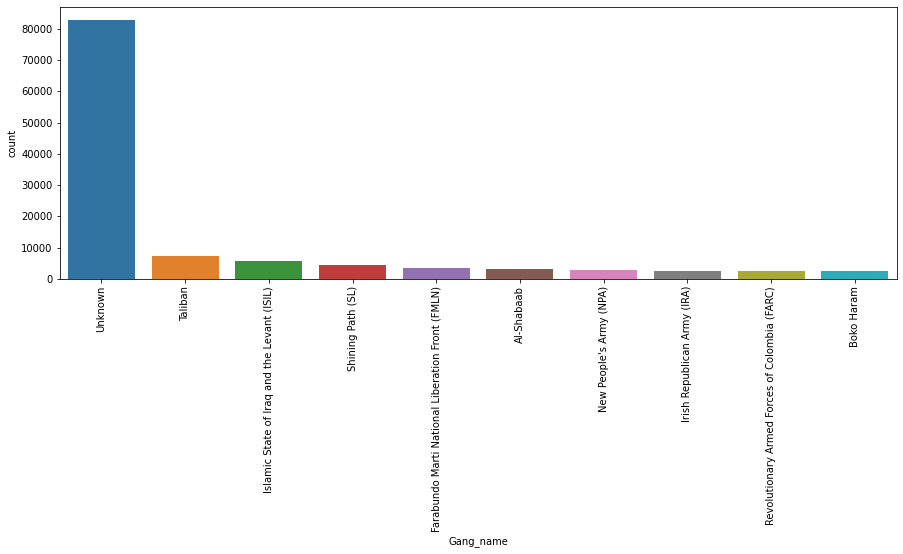

In [69]:
plt.figure(figsize=(15,5))
#plt.rcParams.update({'font.size':10});
plt.xticks(rotation = 90)

sns.countplot(terrorism_df.Gang_name,  order = terrorism_df['Gang_name'].value_counts().head(10).index)


### Conclusion: Top 3 Activitist Groups are Taliban, ISIL in Iraq and SL

# Finding
- Data regardoing Terrorism facts taken from 1970 to 2017.
- Top three Most effected Regions from Terrorism were Middle East & North africa followed by South Asia and South America
- From 2012 to 2017, there was dramatically increase in Terrorism in different part of the world.
- The most frequest way of Terrorism is by Bombing & Explosion followed by Armed Assault & Assanination.
- The most effected Countries by Terrorism are IRAQ on the top and then followed by Pakistan, Afghanistan and India.

# Measure to be Taken to overcome Terrorism
- Strict restriction should be impose on smuggling of heavy weapon and material use for explosion.
- Illegal immigration should be restrict to stop criminals movement.
- Borders checkpoint ensure implementation of latest machinery and trained staff for scanning of items or luggage moving inside country to restrict banned items flow inside country.
- Govt should implement rapid law enforcement for punishing criminals involving in such activities.
- As Terrorist frequently change their way of terrorism, Govt should facilitate Law enforcement agencies to equipped with latest technology to track such activities on modern level, which can help to detect that activities before implementation.
- Govt should immediately ban activitist Groups